# Import Libraries

In [5]:
%load_ext tensorboard
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
print(tf.__version__)


2.0.0


In [6]:
onlinedf = pd.read_excel('OnlineUse.xlsx','OnlineUseData')
onlinedf

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
0,1,0.059697,0.478453,0.108287,0.058701,0.181771,0.099166,0.182478,0.142989,0.154677,...,0.465492,0.767291,0.824691,0.526022,0.820753,0.651606,0.534662,0.180921,TPP,4088
1,2,0.133762,0.474550,0.106176,0.146846,0.139272,0.072946,0.218530,0.165720,0.139868,...,0.717218,0.941951,0.956473,0.571299,0.796031,0.696665,0.723858,0.297806,TPP,19599
2,3,0.060985,0.404530,0.036369,0.067028,0.125814,0.195154,0.170479,0.181745,0.140921,...,0.857945,0.976829,0.922501,0.426156,0.955261,0.652033,0.563364,0.231334,TPP,10606
3,4,0.098957,0.398067,0.020966,0.101616,0.073968,0.205223,0.143792,0.132499,0.200629,...,0.688784,0.941920,0.975631,0.497154,0.912809,0.515677,0.568220,0.547644,TPP,8047
4,5,0.099779,0.467494,0.034454,0.108035,0.181779,0.114250,0.120209,0.230567,0.127471,...,0.682212,0.848249,0.921327,0.644262,0.862050,0.598967,0.535829,0.405589,TPP,14585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,6858,0.146953,0.437176,0.012570,0.099737,0.158389,0.231392,0.179136,0.135164,0.096701,...,0.832720,0.738293,0.927210,0.644679,0.754254,0.698822,0.478010,0.429514,TPP,6215
6853,6859,0.129098,0.517035,0.074068,0.101728,0.139307,0.206464,0.158999,0.201598,0.100548,...,0.456346,0.613044,0.816983,0.552162,0.754569,0.802770,0.235475,0.435987,TPP,6032
6854,6860,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,...,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,EMIS,135
6855,6861,0.142024,0.601744,0.212680,0.211799,0.206316,0.331029,0.185714,0.059227,0.005915,...,0.411838,0.481491,0.064130,0.333459,0.388902,0.908306,0.226775,0.362030,EMIS,5549


In [7]:
onlinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6857 entries, 0 to 6856
Data columns (total 22 columns):
ClinicID                6857 non-null int64
OnlineAppointmentUse    6857 non-null float64
malepct                 6857 non-null float64
unemp                   6857 non-null float64
age16to24               6857 non-null float64
age25to34               6857 non-null float64
age35to44               6857 non-null float64
age45to54               6857 non-null float64
age55to64               6857 non-null float64
age65to74               6857 non-null float64
age75to84               6857 non-null float64
age85plus               6857 non-null float64
phoneeasy               6857 non-null float64
onlineasy               6857 non-null float64
race                    6857 non-null float64
longstdhealth           6857 non-null float64
canmngownhealth         6857 non-null float64
reducedability          6857 non-null float64
prefgpalways            6857 non-null float64
bcaaware             

In [8]:
onlinedf.isnull().sum()

ClinicID                0
OnlineAppointmentUse    0
malepct                 0
unemp                   0
age16to24               0
age25to34               0
age35to44               0
age45to54               0
age55to64               0
age65to74               0
age75to84               0
age85plus               0
phoneeasy               0
onlineasy               0
race                    0
longstdhealth           0
canmngownhealth         0
reducedability          0
prefgpalways            0
bcaaware                0
vendor                  0
numpats                 0
dtype: int64

In [9]:
onlinedf.shape[0]

6857

# Pre-Processing Data

In [10]:
label = LabelEncoder()
onlinedf['vendor'] = label.fit_transform(onlinedf['vendor'])
onlinedf

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
0,1,0.059697,0.478453,0.108287,0.058701,0.181771,0.099166,0.182478,0.142989,0.154677,...,0.465492,0.767291,0.824691,0.526022,0.820753,0.651606,0.534662,0.180921,3,4088
1,2,0.133762,0.474550,0.106176,0.146846,0.139272,0.072946,0.218530,0.165720,0.139868,...,0.717218,0.941951,0.956473,0.571299,0.796031,0.696665,0.723858,0.297806,3,19599
2,3,0.060985,0.404530,0.036369,0.067028,0.125814,0.195154,0.170479,0.181745,0.140921,...,0.857945,0.976829,0.922501,0.426156,0.955261,0.652033,0.563364,0.231334,3,10606
3,4,0.098957,0.398067,0.020966,0.101616,0.073968,0.205223,0.143792,0.132499,0.200629,...,0.688784,0.941920,0.975631,0.497154,0.912809,0.515677,0.568220,0.547644,3,8047
4,5,0.099779,0.467494,0.034454,0.108035,0.181779,0.114250,0.120209,0.230567,0.127471,...,0.682212,0.848249,0.921327,0.644262,0.862050,0.598967,0.535829,0.405589,3,14585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,6858,0.146953,0.437176,0.012570,0.099737,0.158389,0.231392,0.179136,0.135164,0.096701,...,0.832720,0.738293,0.927210,0.644679,0.754254,0.698822,0.478010,0.429514,3,6215
6853,6859,0.129098,0.517035,0.074068,0.101728,0.139307,0.206464,0.158999,0.201598,0.100548,...,0.456346,0.613044,0.816983,0.552162,0.754569,0.802770,0.235475,0.435987,3,6032
6854,6860,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,...,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,-97.000000,0,135
6855,6861,0.142024,0.601744,0.212680,0.211799,0.206316,0.331029,0.185714,0.059227,0.005915,...,0.411838,0.481491,0.064130,0.333459,0.388902,0.908306,0.226775,0.362030,0,5549


In [11]:
onlinedf = onlinedf[(onlinedf!=-97 ).all(axis=1)]
onlinedf = onlinedf[(onlinedf!=-98 ).all(axis=1)]
onlinedf

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
0,1,0.059697,0.478453,0.108287,0.058701,0.181771,0.099166,0.182478,0.142989,0.154677,...,0.465492,0.767291,0.824691,0.526022,0.820753,0.651606,0.534662,0.180921,3,4088
1,2,0.133762,0.474550,0.106176,0.146846,0.139272,0.072946,0.218530,0.165720,0.139868,...,0.717218,0.941951,0.956473,0.571299,0.796031,0.696665,0.723858,0.297806,3,19599
2,3,0.060985,0.404530,0.036369,0.067028,0.125814,0.195154,0.170479,0.181745,0.140921,...,0.857945,0.976829,0.922501,0.426156,0.955261,0.652033,0.563364,0.231334,3,10606
3,4,0.098957,0.398067,0.020966,0.101616,0.073968,0.205223,0.143792,0.132499,0.200629,...,0.688784,0.941920,0.975631,0.497154,0.912809,0.515677,0.568220,0.547644,3,8047
4,5,0.099779,0.467494,0.034454,0.108035,0.181779,0.114250,0.120209,0.230567,0.127471,...,0.682212,0.848249,0.921327,0.644262,0.862050,0.598967,0.535829,0.405589,3,14585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,6857,0.048337,0.428165,0.068086,0.044269,0.220974,0.267470,0.206008,0.121442,0.068959,...,0.781660,0.578018,0.559021,0.521350,0.762043,0.485188,0.348612,0.237807,3,2901
6852,6858,0.146953,0.437176,0.012570,0.099737,0.158389,0.231392,0.179136,0.135164,0.096701,...,0.832720,0.738293,0.927210,0.644679,0.754254,0.698822,0.478010,0.429514,3,6215
6853,6859,0.129098,0.517035,0.074068,0.101728,0.139307,0.206464,0.158999,0.201598,0.100548,...,0.456346,0.613044,0.816983,0.552162,0.754569,0.802770,0.235475,0.435987,3,6032
6855,6861,0.142024,0.601744,0.212680,0.211799,0.206316,0.331029,0.185714,0.059227,0.005915,...,0.411838,0.481491,0.064130,0.333459,0.388902,0.908306,0.226775,0.362030,0,5549


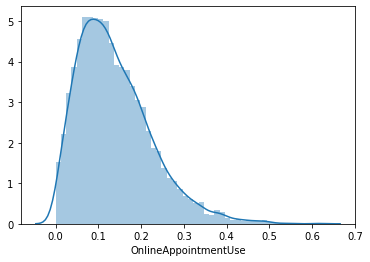

In [12]:
sns.distplot(onlinedf['OnlineAppointmentUse'])

# Baseline

In [13]:
class_dist = onlinedf['OnlineAppointmentUse']
class_mean = class_dist.mean()
new_class = np.square(np.subtract(class_dist,class_mean)).mean()
new_class

0.0074948365045258165

In [14]:
def preprocess_features(onlinedf):
  """Prepares input features from concrete slump test data set.

  Args:
    concrete_dataframe: A Pandas DataFrame expected to contain data
      from the concrete slump test dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = onlinedf[
    ["malepct", "unemp", "age16to24","age25to34","age35to44","age45to54",
     "age55to64", "age65to74", "age75to84", "age85plus","phoneeasy","onlineasy","race",
     "longstdhealth", "canmngownhealth" ,"reducedability","prefgpalways","bcaaware","vendor",
     "numpats"]]
      
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(onlinedf):
  """Prepares target features (i.e., labels) from  housing data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = onlinedf["OnlineAppointmentUse"]
  return output_targets

# Train/Test Split

In [15]:
# Choose the first 83 examples for training.
training_examples = preprocess_features(onlinedf.head(5000))
training_targets = preprocess_targets(onlinedf.head(5000))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose the 20 examples for validation.
validation_examples = preprocess_features(onlinedf.tail(1360))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(onlinedf.tail(1360))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,3.751666e-16,-4.412914e-16,-8.207887e-17,-2.248868e-16,-4.793499e-16,-5.309531e-16,-2.755574e-16,3.809730e-17,2.968001e-16,-2.898126e-16,1.080691e-16,4.118483e-16,2.792655e-16,-2.692624e-16,1.414979e-16,-2.419398e-16,-1.912914e-16,4.354961e-16,-3.871437e-15,1.475264e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-4.459845e+00,-1.059109e+00,-1.884358e+00,-2.221935e+00,-2.411685e+00,-4.296914e+00,-3.662639e+00,-2.774721e+00,-2.355806e+00,-1.863863e+00,-3.403923e+00,-6.461595e+00,-2.977750e+00,-3.789719e+00,-4.956476e+00,-3.133907e+00,-2.524305e+00,-2.647216e+00,-9.562709e-01,-1.471994e+00
25%,-6.609237e-01,-7.244316e-01,-6.377918e-01,-7.111607e-01,-7.263459e-01,-6.725995e-01,-6.498371e-01,-6.767440e-01,-7.243075e-01,-7.143457e-01,-6.800990e-01,-5.944656e-01,-5.097287e-01,-6.533392e-01,-5.732272e-01,-6.910756e-01,-7.403081e-01,-7.278476e-01,-9.562709e-01,-6.961864e-01
50%,-1.517644e-02,-2.665088e-01,-1.123600e-01,-1.334948e-01,-9.436793e-02,-2.188220e-02,3.883014e-02,-4.169084e-03,-4.047174e-03,-1.055056e-01,1.538904e-01,1.285016e-01,4.552160e-01,3.964346e-02,1.388272e-01,-2.577362e-02,-5.251133e-02,-5.748283e-03,-9.562709e-01,-1.877138e-01
75%,6.132905e-01,4.466835e-01,4.649113e-01,5.673009e-01,6.305004e-01,6.504693e-01,6.362749e-01,6.740203e-01,6.615798e-01,5.968365e-01,8.242396e-01,7.239742e-01,7.457775e-01,6.842407e-01,7.283288e-01,6.839303e-01,7.142491e-01,7.190863e-01,9.915921e-01,4.710420e-01
max,5.293471e+00,1.397106e+01,1.148501e+01,5.665689e+00,4.733084e+00,4.160561e+00,3.735980e+00,3.841070e+00,3.739363e+00,6.553328e+00,1.448385e+00,1.886361e+00,9.570645e-01,5.805522e+00,2.048928e+00,4.378769e+00,2.571009e+00,2.890410e+00,2.290167e+00,1.189770e+01


Validation examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,0.151438,0.446549,0.108295,0.201701,0.058096,-0.020359,-0.085887,-0.168383,-0.215878,-0.280654,-0.092239,-0.047741,-0.037969,0.196958,-0.331629,0.449400,-0.042288,-0.265103,-0.525640,-0.324805
std,1.140122,1.261984,1.064557,1.089421,1.042696,1.041909,1.166729,1.001961,0.984633,0.974170,0.959109,1.054267,0.986308,1.050231,1.104126,1.007610,0.945735,0.981516,0.862083,0.944626
min,-3.342183,-1.059109,-1.884358,-1.995307,-2.329953,-3.435693,-3.699791,-2.774721,-2.355806,-1.863863,-2.890517,-4.814692,-2.931289,-3.858343,-6.285784,-2.763272,-2.329837,-2.517120,-0.956271,-1.409788
25%,-0.597704,-0.517139,-0.627172,-0.536829,-0.666576,-0.684775,-0.784354,-0.815209,-0.886559,-0.990729,-0.760019,-0.699533,-0.505256,-0.414075,-0.965895,-0.243390,-0.716159,-0.998414,-0.956271,-0.929132
50%,0.065733,0.160986,-0.011624,0.092573,-0.098831,-0.010801,-0.033325,-0.125532,-0.233715,-0.397961,0.047941,0.104367,0.349128,0.272262,-0.222804,0.451621,-0.088830,-0.295376,-0.956271,-0.556502
75%,0.859840,1.144890,0.696659,0.755035,0.669717,0.566974,0.690333,0.517704,0.431644,0.309266,0.656281,0.732285,0.692437,0.921255,0.479079,1.123760,0.599463,0.403777,-0.956271,0.021859
max,4.232748,9.014825,7.835991,7.420280,4.424413,3.662979,3.636596,2.596051,3.016671,4.448366,1.448385,1.886361,0.957065,3.304625,2.048928,4.378769,2.555621,2.774351,2.290167,9.533342


Training targets summary:


count    5000.000000
mean        0.141221
std         0.087706
min         0.000000
25%         0.075854
50%         0.125747
75%         0.189284
max         0.618939
Name: OnlineAppointmentUse, dtype: float64

Validation targets summary:


count    1360.000000
mean        0.128379
std         0.081547
min         0.000000
25%         0.066825
50%         0.113879
75%         0.178766
max         0.614329
Name: OnlineAppointmentUse, dtype: float64

# Build Model

In [16]:
training_examples.shape

(5000, 20)

In [17]:
validation_examples.shape

(1360, 20)

In [18]:
baseline_model = keras.Sequential([
    keras.layers.Dense(200, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(30, activation=tf.nn.relu,),
    #keras.layers.Dense(15, activation=tf.nn.relu,),
    keras.layers.Dense(1)

  ])


baseline_model.compile(loss='mse',
                optimizer="adam",metrics=['mse'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               4200      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                12060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


# Model Fit

In [19]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)
EPOCHS = 50
b_history = baseline_model.fit(training_examples,training_targets,epochs=EPOCHS,
                   validation_data= (validation_examples, validation_targets),verbose=2,
                               callbacks=[early_stopping_monitor])



Using TensorFlow backend.


Train on 5000 samples, validate on 1360 samples
Epoch 1/50
5000/5000 - 1s - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 2/50
5000/5000 - 1s - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3/50
5000/5000 - 1s - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4/50
5000/5000 - 1s - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 5/50
5000/5000 - 1s - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/50
5000/5000 - 1s - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 7/50
5000/5000 - 1s - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/50
5000/5000 - 1s - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 9/50
5000/5000 - 1s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 10/50
5000/5000 - 1s - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 11/50
5000/5000 - 1s - lo

In [20]:
print("Training examples summary:")
print(min(b_history.history['val_mse']))


Training examples summary:
0.0026285101


In [21]:
losses = pd.DataFrame(b_history.history)

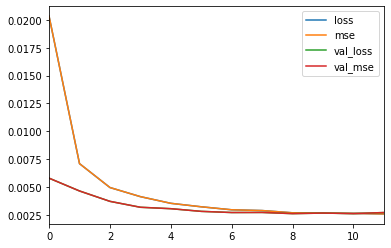

In [22]:
losses.plot()

# Evaluate Model

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [24]:
predictions = baseline_model.predict(validation_examples)
predictions

array([[0.12170038],
       [0.10392611],
       [0.14862123],
       ...,
       [0.1020941 ],
       [0.13370834],
       [0.04732832]], dtype=float32)

In [25]:
mean_absolute_error(validation_targets,predictions)

0.039519121501607135

In [26]:
np.sqrt(mean_squared_error(validation_targets,predictions))

0.052215095912616874

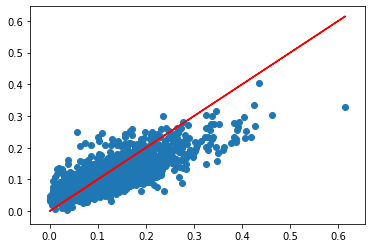

In [27]:
# Our predictions
plt.scatter(validation_targets,predictions)

# Perfect predictions
plt.plot(validation_targets,validation_targets,'r')

In [28]:
errors = validation_targets.values.reshape(1360, 1) - predictions

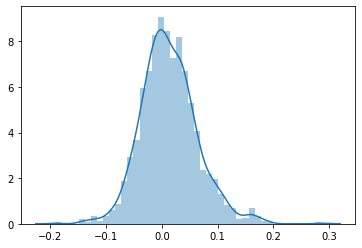

In [29]:
sns.distplot(errors)